In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The above code imports tensorflow, keras, and the imdb dataset from keras. It also nick names tensorflow "tf".

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
max([max(sequence) for sequence in train_data])


9999

This shows the maximum size of each piece of data

In [5]:
import numpy as np

This imports numpy as np

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

This encodes the integer sequences by using hot encoding

In [8]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(4, activation="relu", kernel_regularizer=regularizers.L2(0.001)),
    layers.Dense(4, activation="relu", kernel_regularizer=regularizers.L2(0.001)),
    layers.Dense(4, activation="relu", kernel_regularizer=regularizers.L2(0.001)),
    layers.Dense(1, activation="sigmoid", kernel_regularizer=regularizers.L2(0.001))
])

This tells the computer what kind of model we want to use. Here you deside things like the amount of layers you want and what activation function you would like to use

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

This creates a validation set to help train the model

In [10]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

This is the code that compiles the model

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6215 - loss: 0.2490 - val_accuracy: 0.7700 - val_loss: 0.2159
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7954 - loss: 0.2037 - val_accuracy: 0.8704 - val_loss: 0.1880
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8823 - loss: 0.1702 - val_accuracy: 0.8516 - val_loss: 0.1668
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9074 - loss: 0.1466 - val_accuracy: 0.8806 - val_loss: 0.1492
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9315 - loss: 0.1256 - val_accuracy: 0.8844 - val_loss: 0.1350
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9419 - loss: 0.1075 - val_accuracy: 0.8809 - val_loss: 0.1289
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9448 - loss: 0.0941 - val_accuracy: 0.8849 - val_loss: 0.1195
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9507 - loss: 0.0858 - val_accuracy: 0.8822 - v

This  trains the model

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

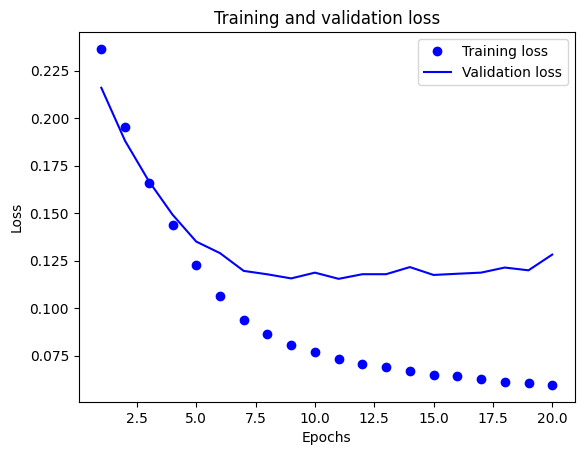

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

This creates a graph showing the training and validation loss

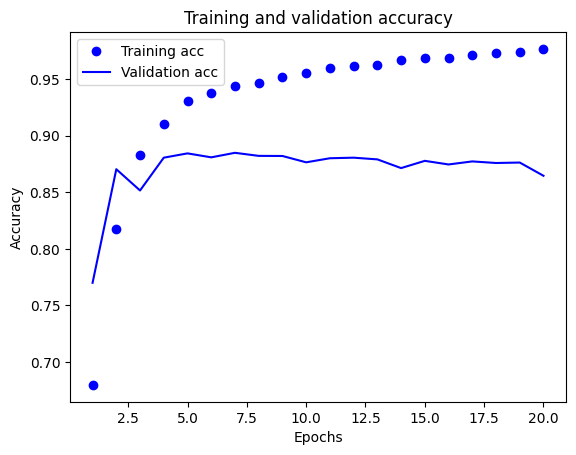

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This creates a graph showing the training and validation accuracy

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7411 - loss: 0.5677
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9016 - loss: 0.2929
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9220 - loss: 0.2224
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9387 - loss: 0.1791
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8780 - loss: 0.2986


With the orgional model set up from class the accuracy is 0.8852 and the loss is 0.2850

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6835 - loss: 0.5973
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9036 - loss: 0.2959
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9233 - loss: 0.2201
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.2881


With adding another hidden layer in the model definition step the training and validation accuracy and training and validation loss graphs showed 3 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8855 and the loss is 0.2868

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7021 - loss: 0.5596
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8972 - loss: 0.2723
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8866 - loss: 0.2881


With using layers with more hidden units in the model definition step the training and validation accuracy and training and validation loss graphs showed 2 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8782 and the loss is 0.2939

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7064 - loss: 0.1935
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8995 - loss: 0.0868
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9241 - loss: 0.0649
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8804 - loss: 0.0872


With using the "mse" loss function instead of "binary_crossentropy" in the model definition step the training and validation accuracy and training and validation loss graphs showed 3 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8819 and the loss is 0.0894

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7467 - loss: 0.5283
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9083 - loss: 0.2571
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9290 - loss: 0.1890
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8784 - loss: 0.3064


With using the "tanh" activation instead of "relu" in the model definition step the training and validation accuracy and training and validation loss graphs showed 3 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8868 and the loss is 0.2857



In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7248 - loss: 0.7339
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8842 - loss: 0.4021
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8881 - loss: 0.3696
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8948 - loss: 0.3472
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8786 - loss: 0.3752


With using the the L2 regularization in the model definition step the training and validation accuracy and training and validation loss graphs showed 14 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8851  and the loss is 0.3411

In [21]:
model = keras.Sequential([
    layers.Dense(9, activation="relu"),
    layers.Dense(9, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5965 - loss: 0.2236
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8346 - loss: 0.1691
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8954 - loss: 0.1489
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9220 - loss: 0.1372
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9389 - loss: 0.1256
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8582 - loss: 0.1483


In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9520 - loss: 0.1166 - val_accuracy: 0.9449 - val_loss: 0.1166
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9612 - loss: 0.1115 - val_accuracy: 0.9491 - val_loss: 0.1143
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9656 - loss: 0.1052 - val_accuracy: 0.9482 - val_loss: 0.1167
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9744 - loss: 0.0979 - val_accuracy: 0.9273 - val_loss: 0.1141
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9775 - loss: 0.0959 - val_accuracy: 0.9328 - val_loss: 0.1109
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9816 - loss: 0.0896 - val_accuracy: 0.9368 - val_loss: 0.1083
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9814 - loss: 0.0856 - val_accuracy: 0.9287 - val_loss: 0.1085
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9821 - loss: 0.0832 - val_accuracy: 0.9263 - v

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

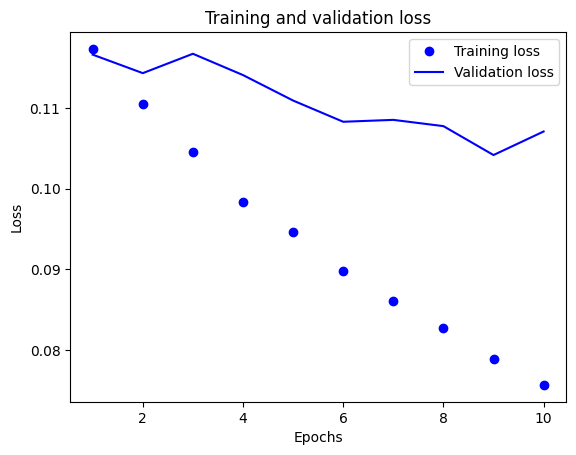

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

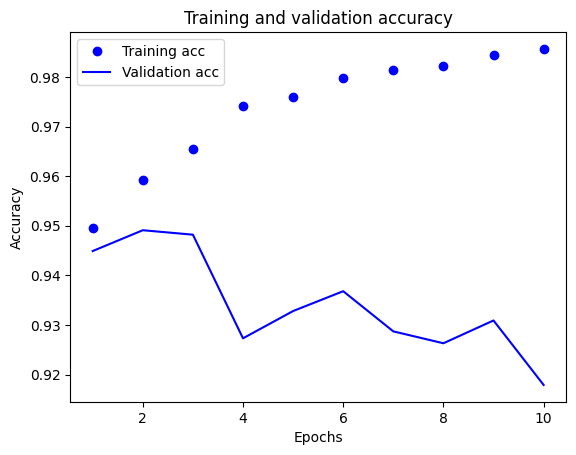

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()